In [19]:
from GG_mthesis import *
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
%matplotlib inline

In [20]:
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

In [21]:
ds_TSG = xr.open_dataset(r'data\02_intermediate\tsg_orchestra_return\b1903933_preprocessed_return.nc')
ds_TSG

<xarray.Dataset>
Dimensions:                 (time: 922)
Coordinates:
    distance_cum            (time) float64 ...
    lat                     (time) float64 ...
    lon                     (time) float64 ...
    depth                   (time) float32 ...
  * time                    (time) datetime64[ns] 2017-12-04T00:31:00.000064 ...
Data variables: (12/24)
    SDN_CRUISE              (time) |S19 ...
    crs                     (time) float64 ...
    SDN_EDMO_CODE           (time) float64 ...
    SDN_STATION             (time) |S17 ...
    SDN_LOCAL_CDI_ID        (time) |S7 ...
    SDN_BOT_DEPTH           (time) float32 ...
    ...                      ...
    T                       (time) float32 ...
    distance_aux            (time) float64 ...
    pressure                (time) float64 ...
    SA                      (time) float64 ...
    CT                      (time) float64 ...
    rho_pot                 (time) float64 ...
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [22]:
ds_TSG.distance_cum/1000

<xarray.DataArray 'distance_cum' (time: 922)>
array([  0.        ,   0.39095187,   0.78365056,   1.17427528,
         1.5642835 ,   1.95536773,   2.34545846,   2.73432286,
         3.12379914,   3.51051374,   3.89959043,   4.28684861,
         4.67526011,   5.06218789,   5.44621697,   5.83086155,
         6.21532469,   6.59855757,   6.9842262 ,   7.37259756,
         7.76252933,   8.15044632,   8.53659402,   8.92227912,
         9.30485694,   9.68487506,  10.06523958,  10.44877995,
        10.83117125,  11.21329923,  11.59434226,  11.97701871,
        12.35754078,  12.73818847,  13.11634406,  13.49591744,
        13.87442207,  14.25326517,  14.62705638,  14.96944815,
        15.29720276,  15.61181992,  15.92008861,  16.1863062 ,
        18.09555188,  18.39357492,  18.71298809,  19.05578804,
        19.41608215,  19.78550199,  20.1596424 ,  20.53617087,
        20.91416686,  21.29415337,  21.67578311,  22.0573293 ,
        22.43615647,  22.81826967,  23.19726168,  23.57589271,
        23.95722367,  24.33993067,  24.72426564,  25.10820457,
        25.4920927 ,  25.87532059,  26.25830058,  26.64040504,
        27.02313441,  27.40898071,  27.79403687,  28.17793457,
        28.56211794,  28.9457388 ,  29.32996431,  29.71393535,
        30.09736782,  30.47826456,  30.85919866,  31.24302226,
...
       326.75900566, 327.03888833, 327.32057428, 327.60188103,
       327.88306879, 328.15906255, 328.4374109 , 328.71797725,
       329.0025638 , 329.28731681, 329.57311094, 329.84658382,
       330.11113214, 330.37671796, 330.64951104, 330.92772383,
       331.20579847, 331.48452341, 331.7693864 , 332.05226719,
       332.33478414, 332.61265004, 332.88814409, 333.16985816,
       333.45879226, 333.75241552, 334.04804532, 334.34824992,
       334.64974682, 334.93861745, 335.22169354, 335.49140156,
       335.75533527, 336.02245888, 336.29465891, 336.57227468,
       336.84852866, 337.11800609, 337.38481315, 337.65891443,
       337.93421084, 338.21119806, 338.49158445, 338.77450958,
       339.06380516, 339.35438491, 339.64283861, 339.91921223,
       340.20091978, 340.49029883, 340.7649875 , 341.03577684,
       341.30570177, 341.57280663, 341.83404142, 342.09592014,
       342.36148212, 342.62498261, 342.88930796, 343.15873315,
       343.44040043, 343.71785344, 343.99526484, 344.27143366,
       344.53658324, 344.78642657, 350.40082729, 350.70417806,
       351.03971169, 351.39388918, 351.7502022 , 352.11368055,
       352.48281733, 352.85400502, 353.22262946, 353.58642515,
       353.95057651, 354.25670779])
Coordinates:
    distance_cum  (time) float64 0.0 391.0 783.7 ... 3.54e+05 3.543e+05
    lat           (time) float64 -57.87 -57.87 -57.86 ... -55.03 -55.04 -55.04
    lon           (time) float64 -56.55 -56.56 -56.56 ... -58.0 -58.0 -57.99
    depth         (time) float32 6.5 6.5 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5 6.5
  * time          (time) datetime64[ns] 2017-12-04T00:31:00.000064 ... 2017-1...

In [23]:
import scipy.stats as stats
stats.describe(ds_TSG.rho_pot)

DescribeResult(nobs=922, minmax=(1026.043572421701, 1026.9829658070635), mean=1026.620808025641, variance=0.10089527450080091, skewness=-0.6273403251151468, kurtosis=-1.1234267305654206)

In [24]:
def TSG_gridding(ds,grid_size):
    #First I create the relevant grid (start to end, 500m steps).
    distance_grid = np.arange(0, float(np.max(ds.distance_cum)), grid_size)

    #Make the cumulative distance the dimension as I want to use it as the interpolating dimension
    ds = ds.swap_dims({'time':'distance_cum'})

    #Here I create new gridded dataset, one with a linear interpolation and another one with a cubic interpolation.
    ds_gridded = ds.interp(distance_cum = distance_grid, method='linear')
    #ds_gridded_cubic = ds.interp(distance_cum = distance_grid, method='cubic')
    return ds_gridded

def calc_grad(rho, dx):
    rho_x = []
    for i in range(len(rho)-1):
        rho_x.append((rho[i+1] - rho[i])/dx)
    rho_x = np.array(rho_x)
    return rho_x

In [25]:
gridsize=500
ds_gridded_500 = TSG_gridding(ds_TSG, gridsize)
ds_grad_500 = calc_grad(ds_gridded_500.rho_pot,gridsize)

gridsize=1000
ds_gridded_1000 = TSG_gridding(ds_TSG, gridsize)
ds_grad_1000 = calc_grad(ds_gridded_1000.rho_pot,gridsize)

gridsize=2000
ds_gridded_2000 = TSG_gridding(ds_TSG, gridsize)
ds_grad_2000 = calc_grad(ds_gridded_2000.rho_pot,gridsize)

gridsize=5000
ds_gridded_5000 = TSG_gridding(ds_TSG, gridsize)
ds_grad_5000 = calc_grad(ds_gridded_5000.rho_pot,gridsize)

gridsize=10000
ds_gridded_10000 = TSG_gridding(ds_TSG, gridsize)
ds_grad_10000 = calc_grad(ds_gridded_10000.rho_pot,gridsize)

gridsize=20000
ds_gridded_20000 = TSG_gridding(ds_TSG, gridsize)
ds_grad_20000 = calc_grad(ds_gridded_20000.rho_pot,gridsize)

In [26]:
len(ds_gridded_1000.rho_pot)

355

C:\Users\gian_\AppData\Local\Temp/ipykernel_7136/269733144.py:6: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(aux[i]), histtype='step', density=True, bins=40, label=label[i])
C:\Users\gian_\AppData\Local\Temp/ipykernel_7136/269733144.py:6: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(aux[i]), histtype='step', density=True, bins=40, label=label[i])
C:\Users\gian_\AppData\Local\Temp/ipykernel_7136/269733144.py:6: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(aux[i]), histtype='step', density=True, bins=40, label=label[i])


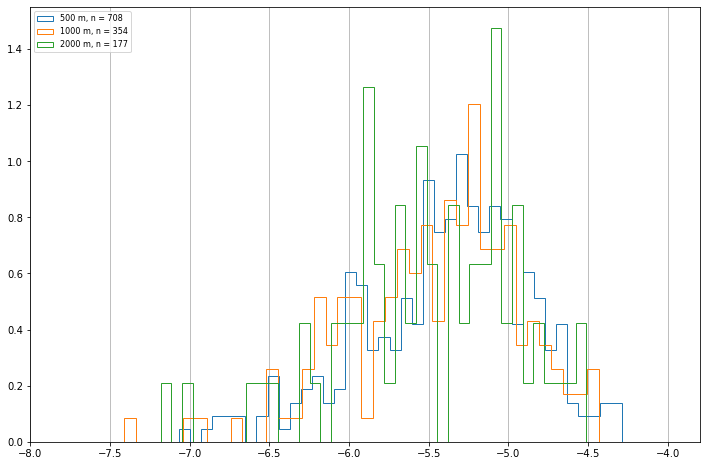

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
aux = [ds_grad_500, ds_grad_1000, ds_grad_2000]#, ds_grad_5000], ds_grad_10000, ds_grad_20000]
label = ['500 m, n = ' + str(len(ds_grad_500)), '1000 m, n = ' + str(len(ds_grad_1000)), '2000 m, n = ' + str(len(ds_grad_2000))]#, '5000 m, n = ' + str(len(ds_grad_5000))]
         #, '10000 m, n = ' + str(len(ds_grad_10000)), '20000 m, n = ' + str(len(ds_grad_20000))]
for i in range(len(aux)):
    ax.hist(np.log10(aux[i]), histtype='step', density=True, bins=40, label=label[i])
ax.legend(loc='upper left', fontsize=8)
ax.set_xlim(-8,-3.8)
ax.grid(axis='x')